# Amazon Product Review 
# Importing Packages 

In [1]:
# Importing Packages 
# These modules is used to data set loding and reading. It consists of (.Json, .csv) files. 
%matplotlib inline
import sqlite3
import json
import csv
print("************************Done*********************")

************************Done*********************


In [2]:
# Importing Packages 
# These modules are used to preprocess data, manipulate data, marge and separate data.import pandas as pd
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
print("************************Done*********************")

************************Done*********************


In [12]:
# Importing packages 
# This modules are used to cluster the data, extracting features, Converting word to vector, Classification and perfomance evaluation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, STOPWORDS
print("*********************Done*************************")

*********************Done*************************


# Reading data from JSON file 

In [13]:
df = pd.read_json('reviews_Office_Products.json',lines='True' )
df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0078800242,"[0, 0]",5,This is an awesome resource to go with the TE ...,"07 19, 2013",A2UESEUCI73CBO,Karen Lange,Great Resource to accompany TE,1374192000
1,0113000316,"[0, 0]",5,even though they were refurbished the colors w...,"01 29, 2013",A3BBNK2R5TUYGV,b,worked great,1359417600
2,0113000316,"[0, 0]",3,"A good deal and I can make them work ok, BUT I...","10 16, 2011",A5J78T14FJ5DU,N. Sommers,A good deal,1318723200
3,043928631X,"[0, 0]",5,Nice added stocking stuffer. Beautiful additi...,"12 31, 2012",A2P462UH5L6T57,D. Morrissey,Beautiful!,1356912000
4,0439340039,"[0, 0]",1,Could not get the game to run. I have Windows...,"09 21, 2013",A2E0X1MWNRTQF4,Drake's mom,Didn't work on my PC,1379721600
5,0439394058,"[0, 0]",5,as described,"07 15, 2014",AAYGDWCI3LDQP,NaN,Five Stars,1405382400
6,0439394058,"[5, 5]",4,"Nice size, colorful simple pictures and a nice...","06 5, 2008",AI7SARYVM8FGA,A. Manternach,Perfect for what I was looking for,1212624000
7,0439394058,"[5, 5]",2,This is not coated in plastic as the descripti...,"01 15, 2014",A1BUVOGGFTGMBN,ANON,very disappointed,1389744000
8,0439394058,"[0, 0]",5,I will take other reviewers suggestions and do...,"12 5, 2013",A35UM9B38X7AYS,C. L. OLeary,A lot for the price.,1386201600
9,0439394058,"[11, 11]",4,"Great calendar, my 3 year old loves it. I bou...","09 7, 2012",AM2U8KJROWYKR,EB227,Needs laminated,1346976000


In [14]:
helpfulness = df[['helpful','asin']]
helpfulness

,helpful,asin
0,"[0, 0]",0078800242
1,"[0, 0]",0113000316
2,"[0, 0]",0113000316
3,"[0, 0]",043928631X
4,"[0, 0]",0439340039
5,"[0, 0]",0439394058
6,"[5, 5]",0439394058
7,"[5, 5]",0439394058
8,"[0, 0]",0439394058
9,"[11, 11]",0439394058


In [15]:
# Split the helpful data frame to  helpful, total. It means Helpfulnes of the product eg: 2/3
df2 = pd.DataFrame(helpfulness)
df2[['helpful','total']] = pd.DataFrame(df2.helpful.values.tolist(), index=df2.index)
dfhelpful = df2[['asin', 'helpful','total']]
dfhelpful

,asin,helpful,total
0,0078800242,0,0
1,0113000316,0,0
2,0113000316,0,0
3,043928631X,0,0
4,0439340039,0,0
5,0439394058,0,0
6,0439394058,5,5
7,0439394058,5,5
8,0439394058,0,0
9,0439394058,11,11


In [16]:
#Join total, helpful data frames to the main data frame. 
dfNew = df.drop('helpful',1)
frames = [dfNew, dfhelpful]
result = dfNew.join(dfhelpful[['helpful','total']])
result

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,0078800242,5,This is an awesome resource to go with the TE ...,"07 19, 2013",A2UESEUCI73CBO,Karen Lange,Great Resource to accompany TE,1374192000,0,0
1,0113000316,5,even though they were refurbished the colors w...,"01 29, 2013",A3BBNK2R5TUYGV,b,worked great,1359417600,0,0
2,0113000316,3,"A good deal and I can make them work ok, BUT I...","10 16, 2011",A5J78T14FJ5DU,N. Sommers,A good deal,1318723200,0,0
3,043928631X,5,Nice added stocking stuffer. Beautiful additi...,"12 31, 2012",A2P462UH5L6T57,D. Morrissey,Beautiful!,1356912000,0,0
4,0439340039,1,Could not get the game to run. I have Windows...,"09 21, 2013",A2E0X1MWNRTQF4,Drake's mom,Didn't work on my PC,1379721600,0,0
5,0439394058,5,as described,"07 15, 2014",AAYGDWCI3LDQP,NaN,Five Stars,1405382400,0,0
6,0439394058,4,"Nice size, colorful simple pictures and a nice...","06 5, 2008",AI7SARYVM8FGA,A. Manternach,Perfect for what I was looking for,1212624000,5,5
7,0439394058,2,This is not coated in plastic as the descripti...,"01 15, 2014",A1BUVOGGFTGMBN,ANON,very disappointed,1389744000,5,5
8,0439394058,5,I will take other reviewers suggestions and do...,"12 5, 2013",A35UM9B38X7AYS,C. L. OLeary,A lot for the price.,1386201600,0,0
9,0439394058,4,"Great calendar, my 3 year old loves it. I bou...","09 7, 2012",AM2U8KJROWYKR,EB227,Needs laminated,1346976000,11,11


# Create .csv file to store all modified data frame reviews. 

In [19]:
result.to_csv('reviews.csv', sep=',', header=False,index=False)
result

PermissionError: [Errno 13] Permission denied: 'reviews.csv'

# Load .csv data to sqlite for Fetch the score and recommendation summary using SQL queries.


In [12]:
class csvrd(object):
    def csvFile(self):
        self.readFile('reviews.csv')
    def readFile(self, filename):
        conn = sqlite3.connect('amazonReviews.db')
        cur = conn.cursor() 
        cur.execute("""CREATE TABLE IF NOT EXISTS amazonReviews(asin INT,overall INT,reviewText varchar,reviewTime INTEGER, reviewerID varchar,reviewerName varchar,summary varchar,unixReviewTime INTEGER,helpful INT,total INT)""")
        filename.encode('utf-8')
        print ("Amazon Reviews table executed in DB ")
        with open(filename) as f:
            reader = csv.reader(f)
            for field in reader:
                cur.execute("INSERT INTO amazonReviews VALUES (?,?,?,?,?,?,?,?,?,?);", field)

        print ("**************CSV Loaded into SQLite******************")
        conn.commit()
        conn.close()

c = csvrd().csvFile()

Amazon Reviews table executed in DB 
**************CSV Loaded into SQLite******************


# Reading the data from SQLite


In [13]:
con = sqlite3.connect('amazonReviews.db')
pd.read_sql_query("SELECT * FROM amazonReviews LIMIT 20", con)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,78800242,5,This is an awesome resource to go with the TE ...,"07 19, 2013",A2UESEUCI73CBO,Karen Lange,Great Resource to accompany TE,1374192000,0,0
1,113000316,5,even though they were refurbished the colors w...,"01 29, 2013",A3BBNK2R5TUYGV,b,worked great,1359417600,0,0
2,113000316,3,"A good deal and I can make them work ok, BUT I...","10 16, 2011",A5J78T14FJ5DU,N. Sommers,A good deal,1318723200,0,0
3,043928631X,5,Nice added stocking stuffer. Beautiful additi...,"12 31, 2012",A2P462UH5L6T57,D. Morrissey,Beautiful!,1356912000,0,0
4,439340039,1,Could not get the game to run. I have Windows...,"09 21, 2013",A2E0X1MWNRTQF4,Drake's mom,Didn't work on my PC,1379721600,0,0
5,439394058,5,as described,"07 15, 2014",AAYGDWCI3LDQP,,Five Stars,1405382400,0,0
6,439394058,4,"Nice size, colorful simple pictures and a nice...","06 5, 2008",AI7SARYVM8FGA,A. Manternach,Perfect for what I was looking for,1212624000,5,5
7,439394058,2,This is not coated in plastic as the descripti...,"01 15, 2014",A1BUVOGGFTGMBN,ANON,very disappointed,1389744000,5,5
8,439394058,5,I will take other reviewers suggestions and do...,"12 5, 2013",A35UM9B38X7AYS,C. L. OLeary,A lot for the price.,1386201600,0,0
9,439394058,4,"Great calendar, my 3 year old loves it. I bou...","09 7, 2012",AM2U8KJROWYKR,EB227,Needs laminated,1346976000,11,11


In [14]:
#If the overall score is above 3, then the label for it will be set to Positive
#else it will be set to Negative
reviews = pd.read_sql_query("""
SELECT 
  overall, 
  summary, 
  helpful, 
  total
FROM amazonReviews 
WHERE overall != 3""", con)
#display data
reviews.head(5)

,overall,summary,helpful,total
0,5,Great Resource to accompany TE,0,0
1,5,worked great,0,0
2,5,Beautiful!,0,0
3,1,Didn't work on my PC,0,0
4,5,Five Stars,0,0


In [15]:
##sentiment column depicts the numeric score of being positive or negative
##usefulScore column depicts the boolean value of total number of votes
reviews["sentiment"] = reviews["overall"].apply(lambda score: "positive" if score > 3 else "negative")
reviews["usefulScore"] = (reviews["helpful"]/reviews["total"]).apply(lambda n: "useful" if n > 0.8 else "useless")
reviews.head(5)

,overall,summary,helpful,total,sentiment,usefulScore
0,5,Great Resource to accompany TE,0,0,positive,useless
1,5,worked great,0,0,positive,useless
2,5,Beautiful!,0,0,positive,useless
3,1,Didn't work on my PC,0,0,negative,useless
4,5,Five Stars,0,0,positive,useless


In [16]:
# Reviews over all score is equal to 5
reviews[reviews.overall == 5].head(5)


,overall,summary,helpful,total,sentiment,usefulScore
0,5,Great Resource to accompany TE,0,0,positive,useless
1,5,worked great,0,0,positive,useless
2,5,Beautiful!,0,0,positive,useless
4,5,Five Stars,0,0,positive,useless
7,5,A lot for the price.,0,0,positive,useless


In [17]:
# #Rows having overall score equal to 1
reviews[reviews.overall == 1].head(5)


,overall,summary,helpful,total,sentiment,usefulScore
3,1,Didn't work on my PC,0,0,negative,useless
30,1,173.00 are you freaking kidding?,1,20,negative,useless
75,1,Could have been better,0,0,negative,useless
78,1,Not as pictured,0,0,negative,useless
79,1,scholastic world map chart,0,0,negative,useless


# # Feature extraction from collected reviews text 

In [18]:
# Assign new dimension to each word and give the word counts
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText
reviews["summaryClean"] = reviews["summary"].apply(cleanReviews)
train, test = train_test_split(reviews, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))


5491440 items in training data, 1372860 in test data


In [19]:
### Using TfidfTransformer().fit_transofrm 
##to fit the train and test data
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#Applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

# Hybrid clustering

In [20]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
#writing cluster data into .csv file. 
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)


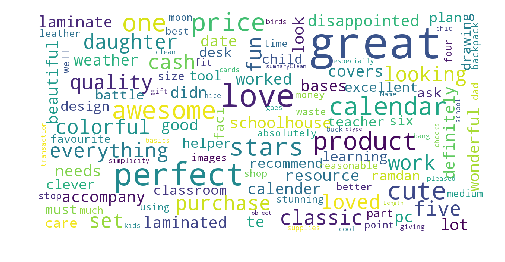

In [21]:
## stop words cleaning 
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(reviews["summaryClean"])

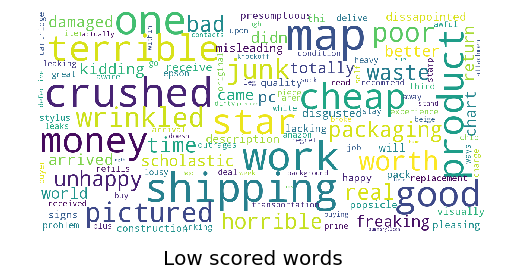

In [22]:
show_wordcloud(reviews[reviews.overall == 1]["summaryClean"], title = "Low scored words")

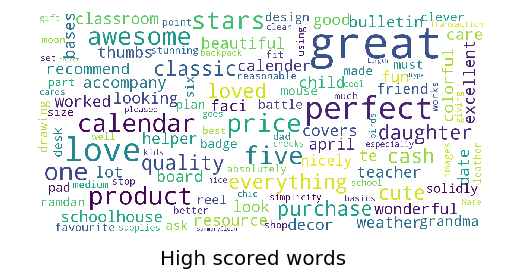

In [23]:
show_wordcloud(reviews[reviews.overall == 5]["summaryClean"], title = "High scored words")

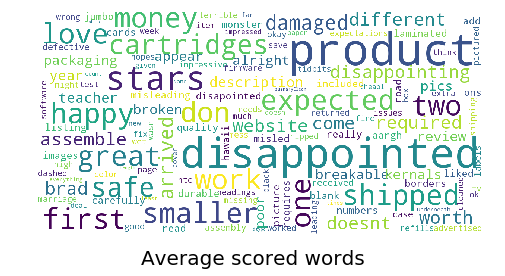

In [24]:
show_wordcloud(reviews[reviews.overall == 2]["summaryClean"], title = "Average scored words")

# Naive Bayes with Multinomial

In [25]:
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

# Naive Bayes Bernoulli

In [26]:
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

# Logistic regression 

In [27]:
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

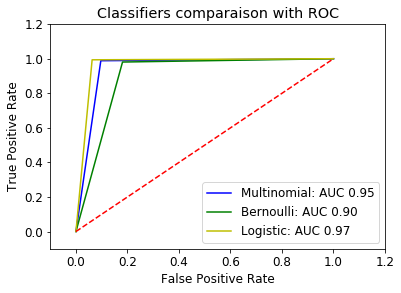

In [28]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Visualize the accuracy, recall and f1-score for Logistic Regression

In [29]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.97      0.94      0.96    276447
   negative       0.98      0.99      0.99   1096413

avg / total       0.98      0.98      0.98   1372860



In [30]:
accuracy_score(y_test, prediction['Logistic'])

0.9823448858587183

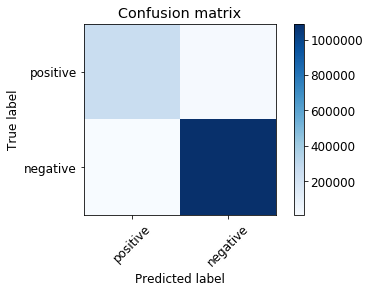

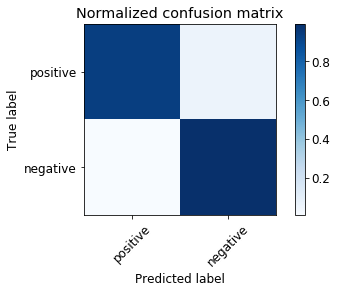

In [31]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

# Visualize the accuracy, recall and f1-score for Naive Bayes Berrnoulli

In [32]:
print(metrics.classification_report(y_test, prediction['Bernoulli'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.91      0.82      0.86    276447
   negative       0.96      0.98      0.97   1096413

avg / total       0.95      0.95      0.95   1372860



In [33]:
accuracy_score(y_test, prediction['Bernoulli'])

0.9482365281237708

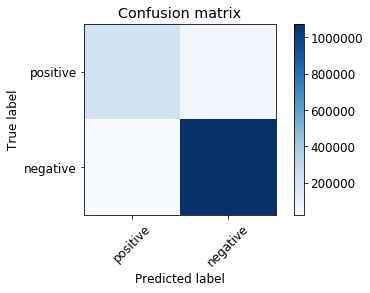

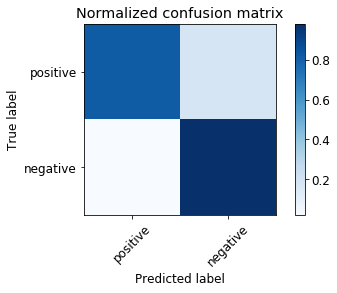

In [34]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

# Visualize the accuracy, recall and f1-score for Naive Bayes Multinomial

In [35]:
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.95      0.90      0.93    276447
   negative       0.98      0.99      0.98   1096413

avg / total       0.97      0.97      0.97   1372860



In [36]:
accuracy_score(y_test, prediction['Multinomial'])

0.9712760223183718

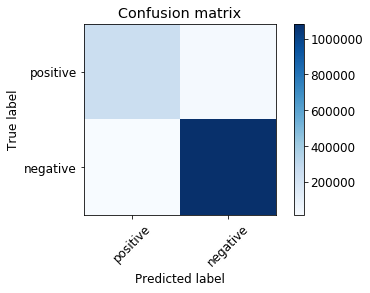

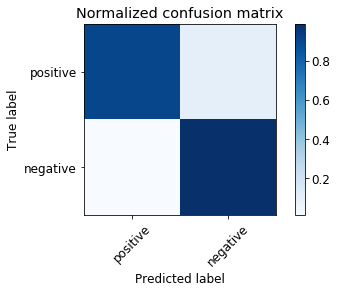

In [37]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

# Displaying words depicting the best and worst features


In [39]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')

,feature,coefficient
2809119,worst,-36.698963
1112032,horrible,-26.319895
2338246,terrible,-24.493739
1885665,poor,-24.242268
1610055,not,-23.740664
2813495,worthless,-23.161857
2619265,useless,-22.009883
180980,awful,-21.854107
160059,at best,-21.657953
2588509,unreliable,-19.674712


# Testing the sentiments of few reviews 

In [40]:
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))

In [41]:
testing_review=testSentiments(logreg, input('Enter Product review:'))
testing_review=testSentiments(logreg, input('Enter Product review:'))
testing_review=testSentiments(logreg, input('Enter Product review:'))
print('****************************END*******************************')

Enter Product review:that is an excellent product and i loved it
Sample estimated as POSITIVE: negative prob 0.001132, positive prob 0.998868
Enter Product review:absolutely awful
Sample estimated as NEGATIVE: negative prob 0.999732, positive prob 0.000268
Enter Product review:the product turned out to be not great
Sample estimated as NEGATIVE: negative prob 0.914776, positive prob 0.085224
****************************END*******************************
